In [ ]:
import pickle
import soundfile as sf
import IPython.display as ipd

import torch
import torch.nn as nn
import torch.optim as optim

from models.model_0 import Model_0
from magnitude_loss import MagnitudeLoss
from models.unet_gen import UNetGenerator
from models.patch_gan_discriminator import PatchGANDiscriminator

from constants import *
from train_cgan import train_cgan
from dataset import build_data_loaders
from disk_utils import save_model, load_model
from predict import predict_polar, get_phases, make_wav
from plotter import plot_loss, plot_heatmaps, plot_waves

In [ ]:
USE_GPU = True
device = torch.device("cuda" if torch.cuda.is_available() and USE_GPU
                      else "cpu")

In [ ]:
with open("dataset/features/min_max.pkl", "rb") as handle:
    min_max = pickle.load(handle)

part = "db"
mini = min_max["ney"]["min"][part]
maxi = min_max["ney"]["max"][part]

test_size = 0.05
train_data_loader, test_data_loader = build_data_loaders(
    min_max, part=part, test_size=test_size)

In [ ]:
# generator = UNetGenerator(in_channels=1, out_channels=1, features=16).to(device)
generator = Model_0(in_channels=1, num_features=32).to(device)
discriminator = PatchGANDiscriminator(in_channels=2).to(device)

adversarial_loss = nn.BCELoss()
# l1_loss = nn.L1Loss()
l1_loss = MagnitudeLoss(mini, maxi)

lr = 2e-4
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

In [ ]:
num_epochs = 50
if not USE_GPU:
    num_epochs = 1

In [ ]:
generator, history = train_cgan(device, train_data_loader, generator,
                                discriminator, adversarial_loss, l1_loss,
                                optimizer_G, optimizer_D, num_epochs, 1)

Epoch [0/50] Batch 0/462 Loss D: 0.7060, Loss G: 138.5739
Epoch [0/50] Batch 50/462 Loss D: 0.0106, Loss G: 129.7658
Epoch [0/50] Batch 100/462 Loss D: 0.0049, Loss G: 123.4456
Epoch [0/50] Batch 150/462 Loss D: 0.0019, Loss G: 119.2251
Epoch [0/50] Batch 200/462 Loss D: 0.0011, Loss G: 115.5368
Epoch [0/50] Batch 250/462 Loss D: 0.0008, Loss G: 111.5163
Epoch [0/50] Batch 300/462 Loss D: 0.0006, Loss G: 107.5088
Epoch [0/50] Batch 350/462 Loss D: 0.0006, Loss G: 104.5353
Epoch [0/50] Batch 400/462 Loss D: 0.0005, Loss G: 100.5706
Epoch [0/50] Batch 450/462 Loss D: 0.0004, Loss G: 96.9851
--------------------------------------------------
Epoch [1/50] Batch 0/462 Loss D: 0.0004, Loss G: 96.1340
Epoch [1/50] Batch 50/462 Loss D: 0.0004, Loss G: 92.8905
Epoch [1/50] Batch 100/462 Loss D: 0.0002, Loss G: 89.1092
Epoch [1/50] Batch 150/462 Loss D: 0.0004, Loss G: 85.0857
Epoch [1/50] Batch 200/462 Loss D: 0.0002, Loss G: 81.9186
Epoch [1/50] Batch 250/462 Loss D: 0.0002, Loss G: 78.9564
Ep

In [6]:
generator.to(torch.device("cpu"))
discriminator.to(torch.device("cpu"))

PatchGANDiscriminator(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(2, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
torch.cuda.empty_cache()
del generator
del discriminator

In [ ]:
pred_limit = 32
predictions, targets = predict_polar(
    generator,
    test_data_loader,
    min_max["ney"]["min"][part],
    min_max["ney"]["max"][part],
    limit=pred_limit,
    from_db=(part == "db"))

08_Gtr_Gs_3/chunk_0, 08_Gtr_Gs_3/chunk_1, 08_Gtr_Gs_3/chunk_2, 08_Gtr_Gs_3/chunk_3
08_Ney_Gs_3/chunk_0, 08_Ney_Gs_3/chunk_1, 08_Ney_Gs_3/chunk_2, 08_Ney_Gs_3/chunk_3
--------------------------------------------------
08_Gtr_Gs_3/chunk_4, 08_Gtr_Gs_3/chunk_5, 08_Gtr_Gs_3/chunk_6, 08_Gtr_Gs_3/chunk_7
08_Ney_Gs_3/chunk_4, 08_Ney_Gs_3/chunk_5, 08_Ney_Gs_3/chunk_6, 08_Ney_Gs_3/chunk_7
--------------------------------------------------
08_Gtr_Gs_3/chunk_8, 08_Gtr_Gs_3/chunk_9, 08_Gtr_Gs_3/chunk_10, 08_Gtr_Gs_3/chunk_11
08_Ney_Gs_3/chunk_8, 08_Ney_Gs_3/chunk_9, 08_Ney_Gs_3/chunk_10, 08_Ney_Gs_3/chunk_11
--------------------------------------------------
08_Gtr_Gs_3/chunk_12, 08_Gtr_Gs_3/chunk_13, 08_Gtr_Gs_3/chunk_14, 08_Gtr_Gs_3/chunk_15
08_Ney_Gs_3/chunk_12, 08_Ney_Gs_3/chunk_13, 08_Ney_Gs_3/chunk_14, 08_Ney_Gs_3/chunk_15
--------------------------------------------------
08_Gtr_Gs_3/chunk_16, 08_Gtr_Gs_3/chunk_17, 08_Gtr_Gs_3/chunk_18, 08_Gtr_Gs_3/chunk_19
08_Ney_Gs_3/chunk_16, 08_Ney_Gs_3

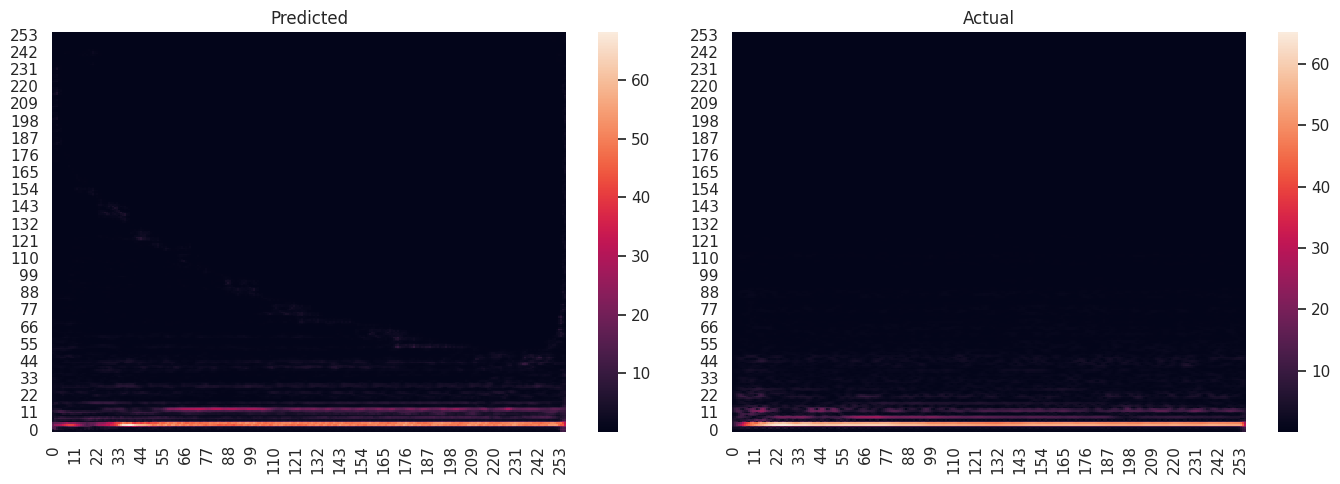

In [8]:
plot_heatmaps(predictions[0], targets[0])

In [9]:
_, test_data_loader_phase = build_data_loaders(
    min_max, part="phase", test_size=test_size)
phases = get_phases(test_data_loader_phase,
                    instrument="ney",
                    limit=pred_limit)

08_Ney_Gs_3/chunk_0, 08_Ney_Gs_3/chunk_1, 08_Ney_Gs_3/chunk_2, 08_Ney_Gs_3/chunk_3
--------------------------------------------------
08_Ney_Gs_3/chunk_4, 08_Ney_Gs_3/chunk_5, 08_Ney_Gs_3/chunk_6, 08_Ney_Gs_3/chunk_7
--------------------------------------------------
08_Ney_Gs_3/chunk_8, 08_Ney_Gs_3/chunk_9, 08_Ney_Gs_3/chunk_10, 08_Ney_Gs_3/chunk_11
--------------------------------------------------
08_Ney_Gs_3/chunk_12, 08_Ney_Gs_3/chunk_13, 08_Ney_Gs_3/chunk_14, 08_Ney_Gs_3/chunk_15
--------------------------------------------------
08_Ney_Gs_3/chunk_16, 08_Ney_Gs_3/chunk_17, 08_Ney_Gs_3/chunk_18, 08_Ney_Gs_3/chunk_19
--------------------------------------------------
08_Ney_Gs_3/chunk_20, 08_Ney_Gs_3/chunk_21, 08_Ney_Gs_3/chunk_22, 08_Ney_Gs_3/chunk_23
--------------------------------------------------
08_Ney_Gs_3/chunk_24, 08_Ney_Gs_3/chunk_25, 08_Ney_Gs_3/chunk_26, 08_Ney_Gs_3/chunk_27
--------------------------------------------------
08_Ney_Gs_3/chunk_28, 08_Ney_Gs_3/chunk_29, 

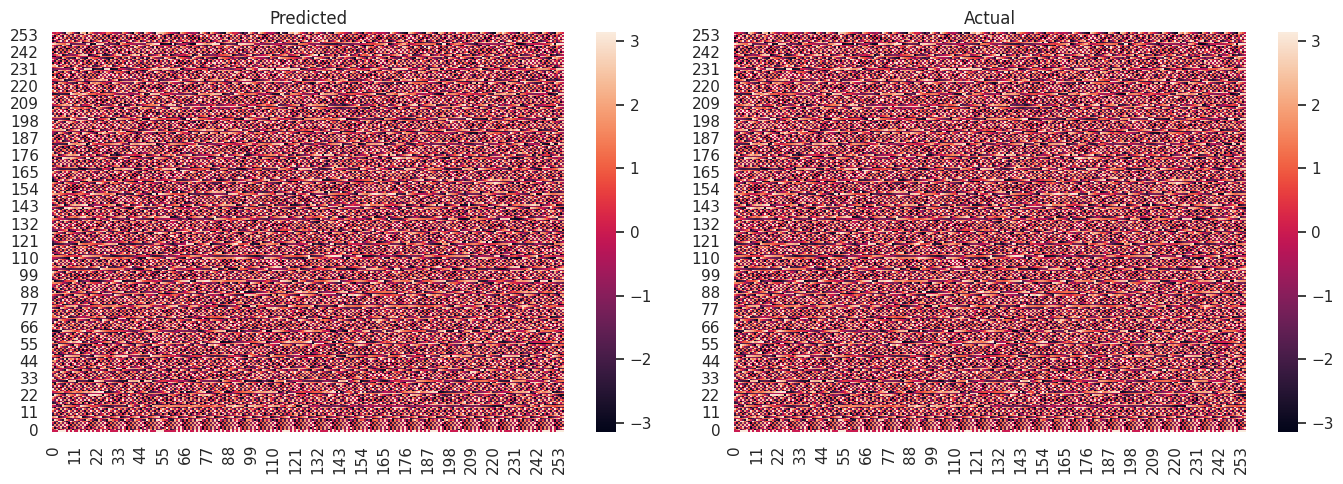

In [10]:
plot_heatmaps(phases[0], phases[0])

80832 80832


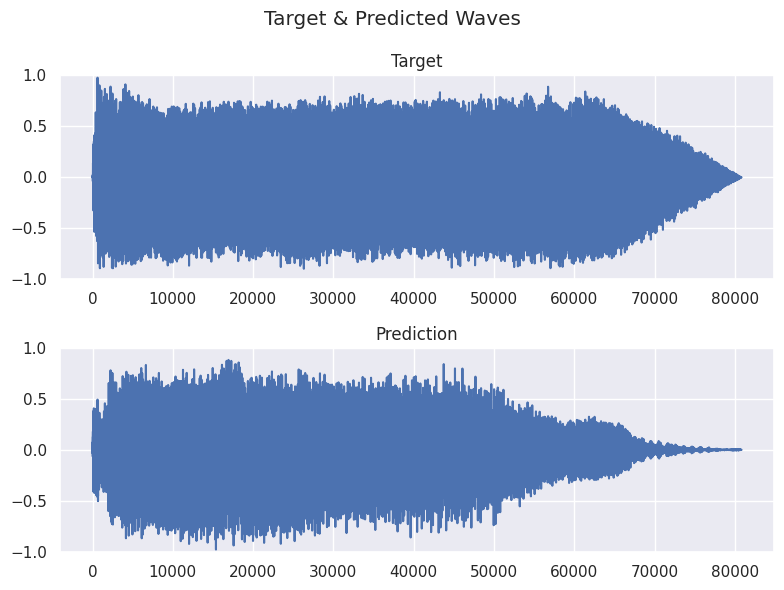

In [11]:
wave_prediction = make_wav(predictions, phases)
wave_target = make_wav(targets, phases)
print(len(wave_prediction), len(wave_target))
plot_waves(wave_target, wave_prediction)

In [ ]:
ipd.Audio(wave_target, rate=SR)

In [ ]:
ipd.Audio(wave_prediction, rate=SR)

In [ ]:
sf.write("z_target.wav", wave_target, SR, format="wav")
sf.write("z_prediction.wav", wave_prediction, SR, format="wav")

In [ ]:
save_model(generator, "generator")
save_model(discriminator, "discriminator")